In [81]:
#data comes from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

#all necessary libraries
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn import preprocessing, neighbors, model_selection
from sklearn import preprocessing, neighbors, model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
from tensorflow import keras

#ignore warning messages
warnings.filterwarnings("ignore", category=FutureWarning)

In [82]:
#reading the data
df = pd.read_csv('data.data')

In [83]:
# 1. Sample code number: id number 
# 2. Clump Thickness: 1 - 10 
# 3. Uniformity of Cell Size: 1 - 10 
# 4. Uniformity of Cell Shape: 1 - 10 
# 5. Marginal Adhesion: 1 - 10 
# 6. Single Epithelial Cell Size: 1 - 10 
# 7. Bare Nuclei: 1 - 10 
# 8. Bland Chromatin: 1 - 10 
# 9. Normal Nucleoli: 1 - 10 
# 10. Mitoses: 1 - 10 
# 11. Class: (2 for benign, 4 for malignant)
df.head()

,id,clump_tickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [84]:
#the fisrt column is id, which has nothing to do with poredicting if a cell is malignant or benign
df = df.drop(['id'],1)

In [85]:
#missing values are identified with ?, this line will replace them with -99999 which is an outlier 
df.replace('?', -99999, inplace=True)

In [86]:
#renmoving na
df.dropna(inplace = True)

In [87]:
#printing the correlatin matrix
print (df.corr())

                        clump_tickness  unif_cell_size  unif_cell_shape  \
clump_tickness                1.000000        0.644913         0.654589   
unif_cell_size                0.644913        1.000000         0.906882   
unif_cell_shape               0.654589        0.906882         1.000000   
marg_adhesion                 0.486356        0.705582         0.683079   
single_epith_cell_size        0.521816        0.751799         0.719668   
bland_chrom                   0.558428        0.755721         0.735948   
norm_nucleoli                 0.535835        0.722865         0.719446   
mitoses                       0.350034        0.458693         0.438911   
class                         0.716001        0.817904         0.818934   

                        marg_adhesion  single_epith_cell_size  bland_chrom  \
clump_tickness               0.486356                0.521816     0.558428   
unif_cell_size               0.705582                0.751799     0.755721   
unif_cell_shape

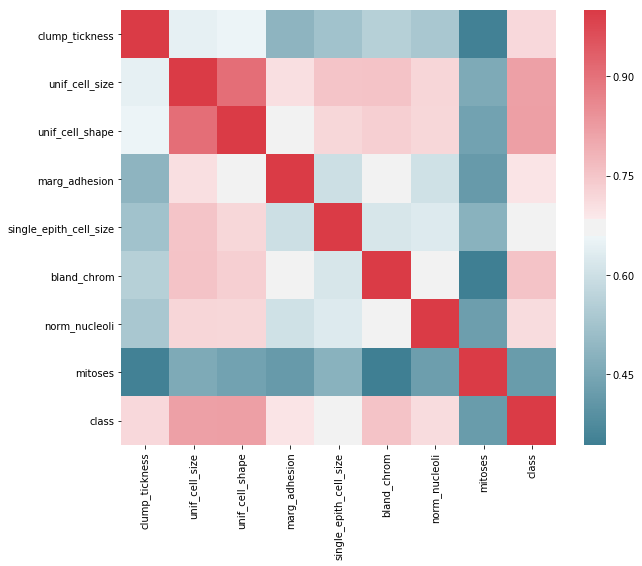

In [88]:
#creating a heat map of correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [89]:
#correlation shows that mitoses doesn't have a strong correlation with the class. In the first step, we are gonna keep that
#but we can explore removing it and see it affects the accuracy of the model

In [90]:
# the label of the class is changed to 1 and 0 
df['class'] = df['class'].replace(2,0)
df['class'] = df['class'].replace(4,1)


In [91]:
# X is features, Y is lable
X = df.drop(['class'], 1)
y = df['class']
#spliting the data into 80% training and 20% testing data sets. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [92]:
#rescaling all inputs to [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train.astype(float))
X_train_normalized = pd.DataFrame(np_scaled)

np_scaled = min_max_scaler.fit_transform(X_test.astype(float))
X_test_normalized = pd.DataFrame(np_scaled)

In [93]:
#Linear Regression
clfReg= LinearRegression().fit(X_train, y_train)

In [94]:
#Binary Logistic Regression
clflog= LogisticRegression().fit(X_train, y_train)

In [95]:
# Support Vector machine
clfsvm = SVC().fit(X_train, y_train)

In [96]:
# K nearest Neighbors
clfknn = neighbors.KNeighborsClassifier().fit(X_train, y_train)

In [103]:
X_train_normalized = X_train_normalized.as_matrix()
y_train = y_train.as_matrix()

In [108]:
#buidling NN
model = keras.Sequential([
    keras.layers.Dense(9, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.softmax),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])
#because the class is binary, we should use binary_crossentropy for the loss funstion
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
              loss ='binary_crossentropy',
              metrics = ['mse'])
model.fit(X_train_normalized, y_train, batch_size= 10, epochs=10)

Epoch 1/10
559/559 [==============================] - 1s 2ms/step - loss: 0.6896 - mean_squared_error: 0.2482
Epoch 2/10
559/559 [==============================] - 0s 217us/step - loss: 0.6896 - mean_squared_error: 0.2482
Epoch 3/10
559/559 [==============================] - 0s 221us/step - loss: 0.6896 - mean_squared_error: 0.2482
Epoch 4/10
559/559 [==============================] - 0s 218us/step - loss: 0.6896 - mean_squared_error: 0.2482
Epoch 5/10
559/559 [==============================] - 0s 224us/step - loss: 0.6896 - mean_squared_error: 0.2482
Epoch 6/10
559/559 [==============================] - 0s 219us/step - loss: 0.6895 - mean_squared_error: 0.2482
Epoch 7/10
559/559 [==============================] - 0s 247us/step - loss: 0.6895 - mean_squared_error: 0.2482
Epoch 8/10
559/559 [==============================] - 0s 225us/step - loss: 0.6895 - mean_squared_error: 0.2482
Epoch 9/10
559/559 [==============================] - 0s 219us/step - loss: 0.6895 - mean_squared_error: 0

In [109]:
# accuracy of all models
print('Regression Accuracy' ,clfReg.score(X_test, y_test))
print('Logistic Regression Accuracy',clflog.score(X_test, y_test))
print('SVM Accuracy',clfsvm.score(X_test, y_test))
print('KNearest Neighbors Accuracy',clfknn.score(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss, test_acc)

Regression Accuracy 0.7363912863530317
Logistic Regression Accuracy 0.9285714285714286
SVM Accuracy 0.9285714285714286
KNearest Neighbors Accuracy 0.9285714285714286
140/140 [==============================] - 0s 2ms/step
0.6783549121447972 0.24260595568588803


In [110]:
# predict an example that the model hasn't seen before
example = np.array([[1,1,5,1,2,3,3,1,1], [1,1,2,1,2,1,3,3,2]])

print('Regression Prediction',clfReg.predict(example))
print('Logistic Regression Prediction',clflog.predict(example))
print('SVM Prediction',clfsvm.predict(example))
print('KNearest Prediction',clfknn.predict(example))
print('Neural Network',model.predict_classes(example))

Regression Prediction [0.1169423  0.05688108]
Logistic Regression Prediction [0 0]
SVM Prediction [0 0]
KNearest Prediction [0 0]
Neural Network [[0]
 [0]]
